# Hyperparameters

[  0   7  46  53  45  42  34  80  46  51  65  99  38  30  52  46  37  30
  97  41  74  48  33  52  93  52 108  95  66  95  84  44  50  41  78  70
  33 124  70  27  50  30  77  45  48  49  47 130  41  56 104 112  37  26
  44  84  54  49 111  28  69]
[ 0  2 11 13 15 25  8 30 54 11  9 28  8  6 13 13  8  8 30 11 25 14  8 17
 25 11 28 45 20 21 30 11 68 10 28 20  9 35 24  6 16  7 28 17 12 12 13 35
  9 12 36 30  8  6  9 26 15 13 48 33 20]
[ 0  1  6  5 11 19  4 12 15  6  5 32  8  3 10  5  5  5 17  6 13  4  4 10
 11  6 17 25  8 11 25  5 39  6 11 31  4 19 50  3  9 19 24 10  6  6  6 15
  6  8 38 11  4  3  5 12  8 22 23 18 10]
[ 0  0  3  6  7 11  2  8  8  3  3 12  3  2  5  4  6  3 13  4 14  2  2  6
  6  3  7 14  6  7  8  3 31  3  3 30  3  9 29  2  6  2  8  6  4  3  4  6
  3  4 19  7  3  2  4  6  4  5 13  8  7]
[ 0  0  2  4  6 12  2  8 12  3  2 11  3  2  4  2  5  3 11  3 12  3  2  5
  6  2  6  5  6  4  7  2 14  2  6 19  2  6 32  1  6  2  8  6  3  2  6 13
  4  3  5  3  2  2  4  4  3  2  6  7  6]
[ 0

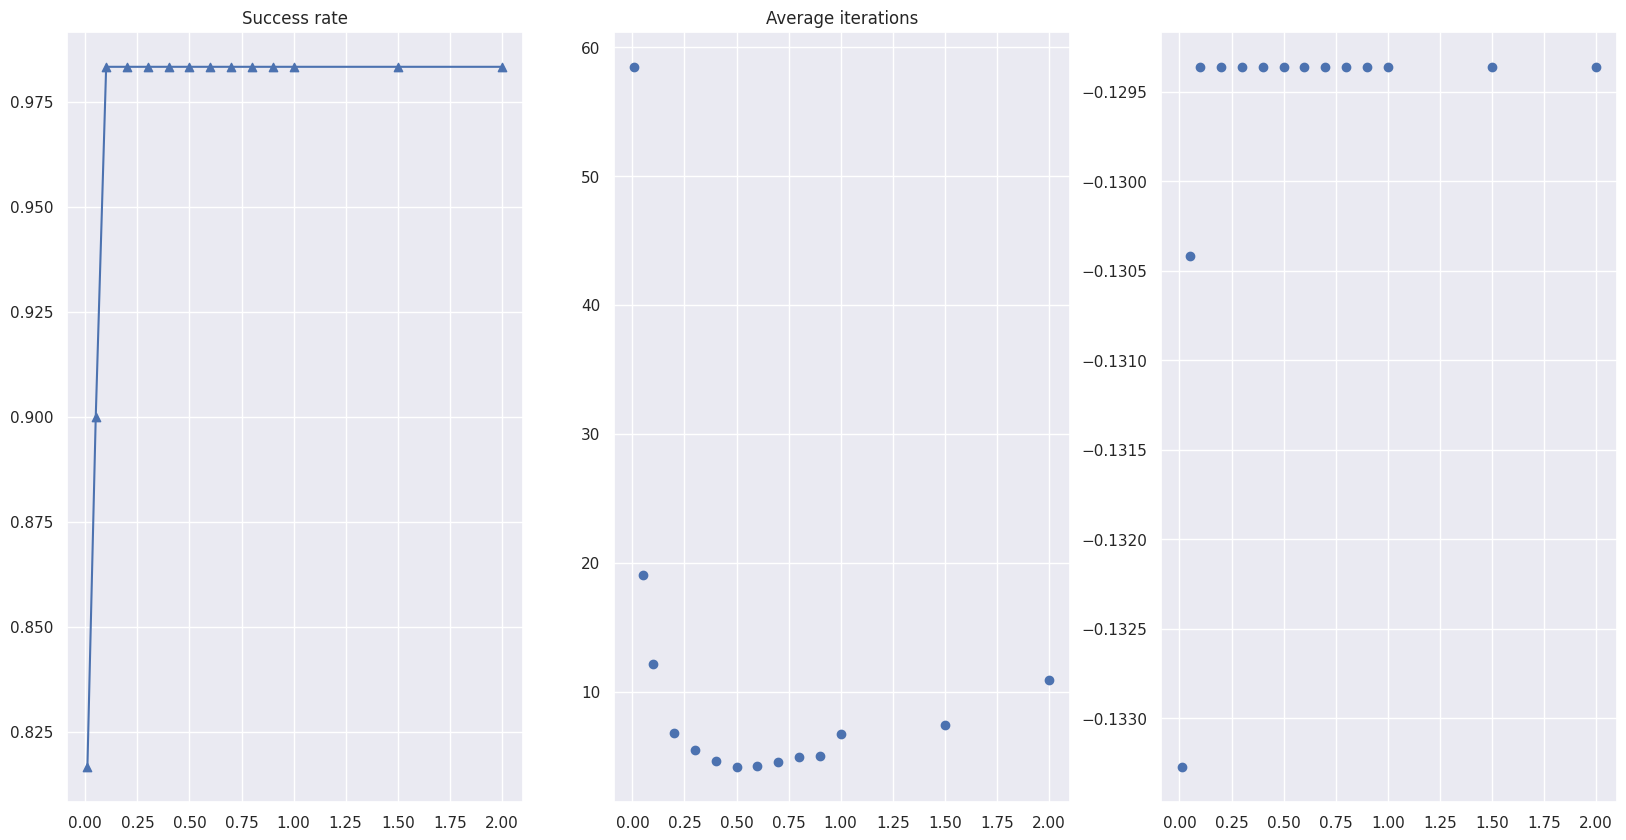

In [2]:

import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np

size = 10

sns.set_theme(style = 'darkgrid')
fig,axs = plt.subplots (nrows = 1, ncols = 3, figsize = (20, 10))

sr_plot = axs[0]
its_plot = axs[1] 
approx_plot = axs[2]

stepsizes = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0]

success_rates = []
average_its = [] 
approx_ratios = []

ansatz = 'MA-ALT'

for stepsize in stepsizes:
    
    trainset = pd.read_csv(f'data/train_{ansatz}/Training_size_{size}_stepsize_{stepsize}.csv')


    sr = (len(trainset[trainset['Train (flt)'] == trainset['Test (flt)']]) -1 ) / (len(trainset) - 1)
    
    its_1 = np.array(trainset['Train_iterations_1 (int)'])
    its_2 = np.array(trainset['Train_iterations_2 (int)'])
    its_3 = np.array(trainset['Train_iterations_3 (int)'])
    barens = np.array(trainset['Baren (int)'])

    print(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
    iterations = np.mean(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
    success_rates.append(sr)
    average_its.append(iterations)

    approx = np.mean((trainset['Train (flt)'] - trainset['Test (flt)']) / trainset['Test (flt)'])
    approx_ratios.append(approx)
sr_plot.scatter(stepsizes, success_rates, marker = '^')
sr_plot.plot(stepsizes, success_rates)
sr_plot.set_title('Success rate')

its_plot.scatter(stepsizes, average_its)
its_plot.set_title('Average iterations')

approx_plot.scatter(stepsizes, approx_ratios)

# delete zeor line !!!!!!!!!!!!!
plt.show()

In [38]:
import numpy as np

a = np.array([1,2,3])
b = np.array([3,2,1])

print(np.maximum(a,b))

[3 2 3]
